# Your Instagram Data Dashboard
Here is an overview of information about you that we received from your Instagram data. 


In [19]:
import os 
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from collections import Counter
import warnings 
warnings.filterwarnings('ignore')

The graph below shows your top five favorite instagram accounts. Your 'favorite' accounts are the accounts with the highest number of posts you have liked since your account has been active. 

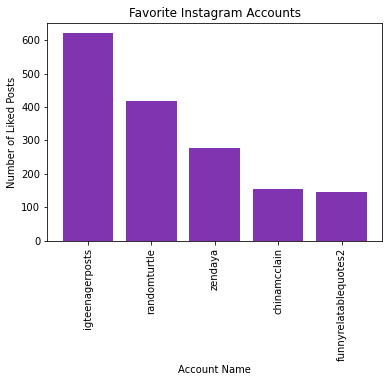

In [20]:
#Read in liked_posts.json file
with open('./data/nia_ig_data/likes/liked_posts.json') as like_data:
    liked_posts_json = json.load(like_data)

#Parse through the liked_posts.json file to take count of all of the posts I've liked and which account they belong to
liked_posts = []
for like in liked_posts_json['likes_media_likes']:
    liked_posts.append((like['title']))
top_liked_accounts = (Counter(liked_posts).most_common(5))
account_name = list(zip(*top_liked_accounts))[0]
num_liked_posts = list(zip(*top_liked_accounts))[1]

#Create a barplot to display my top 5 favorite accounts 
x_pos = np.arange(len(account_name))
plt.bar(x_pos, num_liked_posts,align='center',color='#8134AF')
plt.rcParams.update({'font.size': 10})
plt.xticks(x_pos, account_name) 
plt.xticks(rotation=90)
plt.title("Favorite Instagram Accounts")
plt.xlabel('Account Name')
plt.ylabel('Number of Liked Posts')
plt.show()

In [21]:
#The following is a word cloud showing the inferences instagram has made about me from collected ad data.
#Read in the ads_interests.json file
#with open('./data/nia_ig_data/information_about_you/ads_interests.json') as ads_interests_data:
    #ads_interests_json = json.load(ads_interests_data)

#Parse through the ads_interests.json file to put all of my inferrred interests based off instagram's ad tracking into a list
#ads_interests = []
#for interest in ads_interests_json['inferred_data_ig_interest']:
    #ads_interests.append((interest['string_map_data']['Interest']['value']))

#interests = []
#for i in ads_interests:
    #if i not in interests:
        #interests.append(i)
        
#Create word cloud visualization based off common frequency of interests 
#word_cloud_dict=Counter(interests)
#wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_cloud_dict)
#plt.figure(figsize=(15,8))
#plt.imshow(wordcloud)
#plt.axis("off")

In [22]:
#Personal Information =(Username, Email, Phone Number, Gender)
with open('./data/nia_ig_data/account_information/personal_information.json') as ads_interests_data:
    personal_information_json = json.load(ads_interests_data)
    
user_name = personal_information_json['profile_user'][0]['string_map_data']['Username']['value']
phone_number = personal_information_json['profile_user'][0]['string_map_data']['Phone Number']['value']
email = personal_information_json['profile_user'][0]['string_map_data']['Email']['value']
gender = personal_information_json['profile_user'][0]['string_map_data']['Gender']['value']


In [23]:
#Primary Account Location
with open('./data/nia_ig_data/information_about_you/account_based_in.json') as ads_interests_data:
    account_based_json = json.load(ads_interests_data)
primary_account_location = account_based_json['inferred_data_primary_location'][0]['string_map_data']['City Name']['value']

In [24]:
import pandas as pd
data = {'Category':['Username', 'Phone Number', 'Email', 'Gender', 'Primary Account Location'],
        'Your Information':[user_name, phone_number, email, gender, primary_account_location]}
df = pd.DataFrame(data)
df = df.style.set_properties(**{'text-align': 'left'})
df

,Category,Your Information
0,Username,nia.dinay
1,Phone Number,+17082080999
2,Email,nia_graygirl2@yahoo.com
3,Gender,female
4,Primary Account Location,"Ann Arbor, Michigan"


In [25]:
#Number of Advertisers Using Your Info
with open('./data/nia_ig_data/ads_and_businesses/advertisers_using_your_activity_or_information.json') as ads_interests_data:
    advertisers_using_json = json.load(ads_interests_data)
    
num_advertisers_using_data = len(advertisers_using_json['ig_custom_audiences_all_types'])

In [26]:
#Size of File
import os

def get_size(start_path = './data/nia_ig_data'):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(start_path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            # skip if it is symbolic link
            if not os.path.islink(fp):
                total_size += os.path.getsize(fp)

    return total_size*(0.000001)

data_size = round(get_size())

In [27]:
"Instagram has collected a total of " + str(data_size) + " megabytes of data about you. There are " + str(num_advertisers_using_data) + " advertisers using your Instagram data."

'Instagram has collected a total of 286 megabytes of data about you. There are 88 advertisers using your Instagram data.'